# Lab 4: Coordinates

In [1]:
import numpy as np
import ugradio
from ugradio.timing import nch
from ugradio import leo
import time
from __future__ import division
import astropy
from astropy import units as u
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt
from itertools import chain
from scipy import signal
import scipy

## Test Galactic Coordinates (l,b) = (120, 0)

In [19]:
test_gal = SkyCoord(120, 0, frame='galactic', unit='deg')
test_icrs = test_gal.transform_to('icrs')
test_ra = test_icrs.ra.degree
test_dec = test_icrs.dec.degree
test_alt, test_az = ugradio.coord.get_altaz(test_ra, test_dec, lat=leo.lat, lon=leo.lon, alt=leo.alt, equinox='J2019')
print 'RA and declination:', test_ra, test_dec
print 'Altitude and Azimuth:', test_alt, test_az

RA and declination: 6.45083113624 62.725726754
Altitude and Azimuth: 45.5860601983 324.565723692


## North Celestial Pole Coordinates

l = (105 to 160)

b = (15 to 50)

Note: telescope range -- altitude(14 to 85), azimuth(5 to 355)

In [37]:
l = np.arange(105, 160, 2)
b = np.arange(15, 50, 2)

ra_dec = []

for i in range(len(l)):
    for j in range(len(b)):
        galactic = SkyCoord(l[i], b[j], frame='galactic', unit='deg')
        icrs = galactic.transform_to('icrs')
        ra = icrs.ra.degree
        dec = icrs.dec.degree
        ra_dec.append([ra, dec])
        
np.savez('ra_dec_ncp', ra_dec)

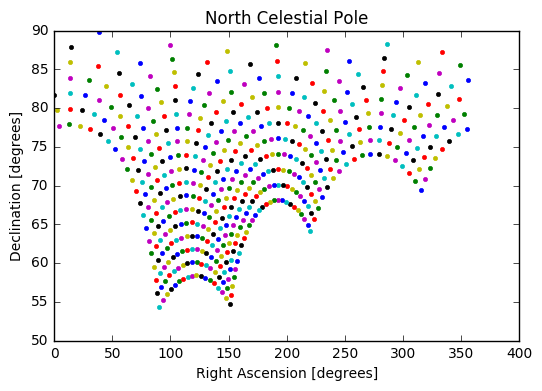

In [27]:
for i in range(len(ra_dec)):
    plt.plot(ra_dec[i][0], ra_dec[i][1], '.')
    plt.title('North Celestial Pole')
    plt.xlabel('Right Ascension [degrees]')
    plt.ylabel('Declination [degrees]')
plt.show()

## Predicting NCP Location

In [3]:
def jd():
    unix_t = time.time()
    t = astropy.time.Time(unix_t, format='unix')
    return t.jd

In [11]:
hr = 1/24
jd = ugradio.timing.julian_date()

In [7]:
# Thursday, April 25, 2019

jd0 = 2458598.79167
jd2 = 2458598.87500
jd4 = 2458598.95833
jd6 = 2458599.04167
jd8 = 2458599.12500
jd10 = 2458599.20833
jd11 = 2458599.25000
jd12 = 2458599.29167
jd13 = 2458599.33333
jd14 = 2458599.37500
jd16 = 2458599.45833
jd18 = 2458599.54167
jd20 = 2458599.62500
jd22 = 2458599.70833
jd24 = 2458599.79167

In [5]:
def ncp_predict(l1, l2, b1, b2, jd):
    l = np.arange(l1, l2, 2)
    b = np.arange(b1, b2, 2)

    ra_dec = []

    for i in range(len(l)):
        for j in range(len(b)):
            galactic = SkyCoord(l[i], b[j], frame='galactic', unit='deg')
            icrs = galactic.transform_to('icrs')
            ra = icrs.ra.degree
            dec = icrs.dec.degree
            ra_dec.append([ra, dec])

    alt = []
    az = []

    for i in range(len(ra_dec)):
        alt_, az_ = ugradio.coord.get_altaz(ra_dec[i][0], ra_dec[i][1], jd=jd, lat=leo.lat, lon=leo.lon, alt=leo.alt, equinox='J2019')
        alt.append(alt_)
        az.append(az_)
        plt.plot(alt, az, '.')
        plt.title('North Celestial Pole')
        plt.xlabel('Altitude [degrees]')
        plt.ylabel('Azimuth [degrees]')
    plt.show()

In [6]:
ugradio.timing.julian_date()

2458610.409131547

### Section 1: l (105 to 160), b (35 to 50)

Observation completed on April 19, 2019 ~6 pm

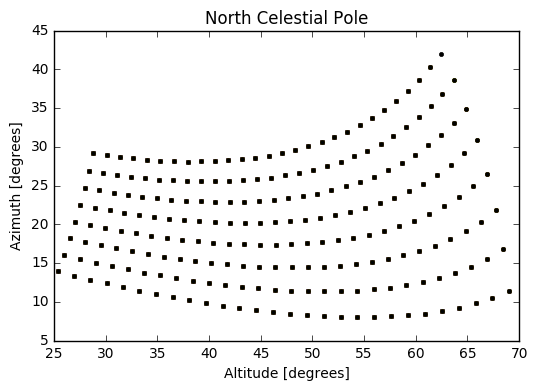

In [22]:
ncp_predict(105, 160, 35, 50, jd18+12)

### Section 2: l (131 to 160), b (15 to 34)

Observe between 11:00 am to 1:00 pm -- completed on April 26 (note: files named with 'date' instead of actual date)

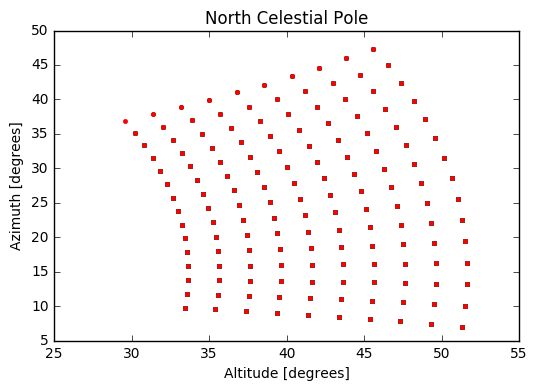

In [24]:
ncp_predict(131, 160, 15, 34, jd12+12) # 12:00 4/25/19

### Section 3: l (105 to 114), b (15 to 34)

Observe between 10:00 to 11:00

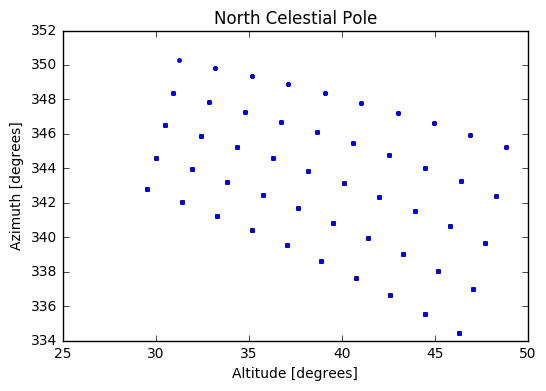

In [30]:
ncp_predict(105, 114, 15, 34, jd12+12-hr) # 12:00 4/25/19

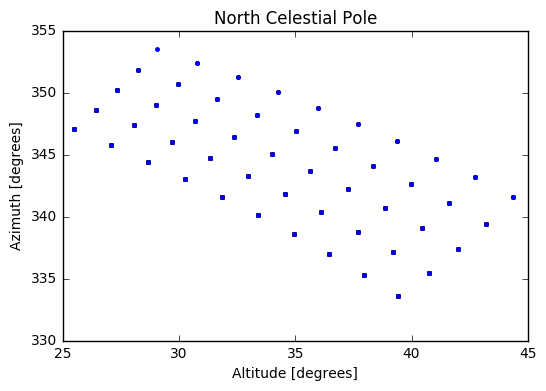

In [15]:
ncp_predict(105, 114, 15, 34, jd+hr) # current time

In [17]:
l = np.arange(105, 114, 2)
b = np.arange(15, 34, 2)

ra_dec = []

for j in range(len(b)):
    for i in range(len(l)):
        galactic = SkyCoord(l[i], b[j], frame='galactic', unit='deg')
        icrs = galactic.transform_to('icrs')
        ra = icrs.ra.degree
        dec = icrs.dec.degree
        ra_dec.append([ra, dec])
        
#jd0 = 2458599.79167 # 00:00 on April 26, 2019
#hr = 1/24

for i in range(len(ra_dec)):
    ra = ra_dec[i][0]
    dec = ra_dec[i][1]
    icrs = SkyCoord(ra, dec, frame='icrs', unit='deg')
    gal = icrs.transform_to('galactic')
    l = gal.l.degree
    b = gal.b.degree
    alt, az = ugradio.coord.get_altaz(ra, dec, lat=leo.lat, lon=leo.lon, alt=leo.alt, equinox='J2019')
    if az > 350:
        print 'galactic coordinate', l, b, 'out of range'

galactic coordinate 113.0 29.0 out of range
galactic coordinate 113.0 31.0 out of range
galactic coordinate 113.0 33.0 out of range


### Section 4: l (115 to 130), b (15 to 22)

Observe between 5:00 pm and 6:00 pm -- partially done, see spreadsheet

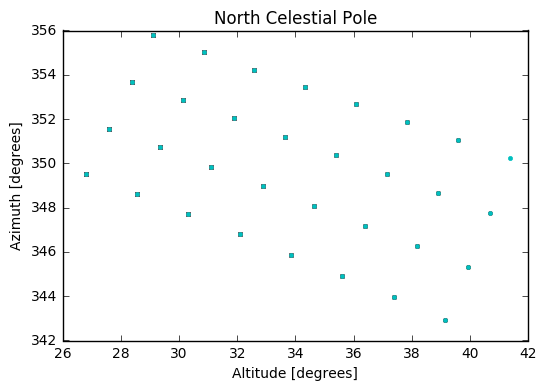

In [32]:
ncp_predict(115, 130, 15, 22, jd18+12) # 00:00 + hour(s) 4/25/19

### Section 5: l (115 to 130), b (23 to 34)

Split into smaller ranges -- see spreadsheet.

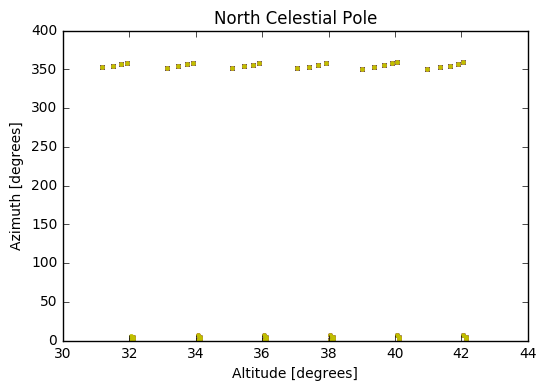

In [101]:
ncp_predict(115, 130, 23, 34, jd0 + 12*hr) # 00:00 + hour(s) 4/25/19

In [20]:
l = np.arange(113, 130, 2)
b = np.arange(15, 34, 2)

ra_dec = []

for i in range(len(l)):
    for j in range(len(b)):
        galactic = SkyCoord(l[i], b[j], frame='galactic', unit='deg')
        icrs = galactic.transform_to('icrs')
        ra = icrs.ra.degree
        dec = icrs.dec.degree
        ra_dec.append([ra, dec])
        
jd0 = 2458599.79167+11 # 00:00 on May 6, 2019
hr = 1/24

for i in range(len(ra_dec)):
    for j in range(24):
        ra = ra_dec[i][0]
        dec = ra_dec[i][1]
        icrs = SkyCoord(ra, dec, frame='icrs', unit='deg')
        gal = icrs.transform_to('galactic')
        l = gal.l.degree
        b = gal.b.degree
        alt, az = ugradio.coord.get_altaz(ra, dec, jd=jd0+j*hr, lat=leo.lat, lon=leo.lon, alt=leo.alt, equinox='J2019')
        if az < 350 and az > 5:
            print 'galactic coordinate', l, b, 'observable at', j
    

galactic coordinate 113.0 15.0 observable at 0
galactic coordinate 113.0 15.0 observable at 1
galactic coordinate 113.0 15.0 observable at 2
galactic coordinate 113.0 15.0 observable at 3
galactic coordinate 113.0 15.0 observable at 4
galactic coordinate 113.0 15.0 observable at 5
galactic coordinate 113.0 15.0 observable at 6
galactic coordinate 113.0 15.0 observable at 7
galactic coordinate 113.0 15.0 observable at 10
galactic coordinate 113.0 15.0 observable at 11
galactic coordinate 113.0 15.0 observable at 12
galactic coordinate 113.0 15.0 observable at 13
galactic coordinate 113.0 15.0 observable at 14
galactic coordinate 113.0 15.0 observable at 15
galactic coordinate 113.0 15.0 observable at 16
galactic coordinate 113.0 15.0 observable at 17
galactic coordinate 113.0 15.0 observable at 22
galactic coordinate 113.0 15.0 observable at 23
galactic coordinate 113.0 17.0 observable at 0
galactic coordinate 113.0 17.0 observable at 1
galactic coordinate 113.0 17.0 observable at 2
gal

Observable at:

2:00 -- [119, 25] -- done!

3:00 -- [115, 19], [115, 21], [117, 19], [117, 21], [117, 23], [117, 25], [119, 19], [119, 21], [119, 23] -- done!

6:00 -- [121, 21], [121, 23], [123, 21], [123, 23], [125, 21], [125, 23], [127, 17], [127, 19], [127, 21], [127, 23], [129, 15], [129, 17], [129, 19], [129, 21], [129, 23] -- tomorrow?

10:00 -- l (105 to 114), b (15 to 34) -- done!

11:00 -- [127, 25], [129, 25], [129, 27], [129, 29] -- done!

12:00 -- l (131 to 160), b (15 to 34) -- done!

14:00 -- [127, 29] -- done!

16:00 -- [121, 33], [123, 33], [125, 31], [125, 33], [127, 31], [127, 33], [129, 31], [129, 33] -- done!

19:00 -- [121, 31] -- done!

19:30 -- [115, 31], [115, 33], [117, 31], [117, 33], [119, 31], [119, 33] -- done!

21:30 -- [119, 29] -- *** May 1 ***

22:00 -- [115, 23], [115, 25], [115, 27], [115, 29], [117, 27], [117, 29] -- done!

In [8]:
l = 119
b = 29

galactic = SkyCoord(l, b, frame='galactic', unit='deg')
icrs = galactic.transform_to('icrs')
ra = icrs.ra.degree
dec = icrs.dec.degree
        
jd0 = 2458604.79167 # 00:00 on May 1, 2019
half_hr = 1/48

for j in range(48):
    icrs = SkyCoord(ra, dec, frame='icrs', unit='deg')
    gal = icrs.transform_to('galactic')
    l = gal.l.degree
    b = gal.b.degree
    alt, az = ugradio.coord.get_altaz(ra, dec, jd=jd0+j*half_hr, lat=leo.lat, lon=leo.lon, alt=leo.alt, equinox='J2019')
    if az < 350 and az > 5:
        print 'galactic coordinate', l, b, 'observable at', j/2


galactic coordinate 119.0 29.0 observable at 21.5


### Old Predictions

In [25]:
# Sunday, April 21, 2019

jd0 = 2458594.79167
jd2 = 2458594.87500
jd4 = 2458594.95833
jd6 = 2458595.04167
jd8 = 2458595.12500
jd10 = 2458595.20833
jd12 = 2458595.29167
jd14 = 2458595.37500
jd16 = 2458595.45833
jd18 = 2458595.54167
jd20 = 2458595.62500
jd22 = 2458595.70833
jd24 = 2458595.79167

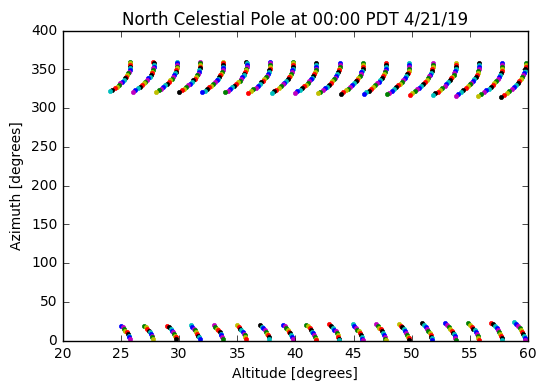

In [29]:
for i in range(len(ra_dec)):
    alt, az = ugradio.coord.get_altaz(ra_dec[i][0], ra_dec[i][1], jd=jd0, lat=leo.lat, lon=leo.lon, alt=leo.alt, equinox='J2019')
    plt.plot(alt, az, '.')
    plt.title('North Celestial Pole at 00:00 PDT 4/21/19')
    plt.xlabel('Altitude [degrees]')
    plt.ylabel('Azimuth [degrees]')
plt.show()

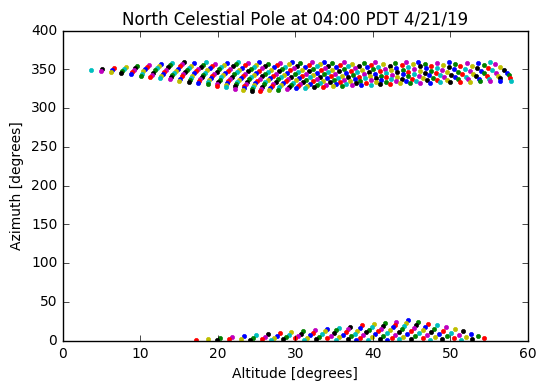

In [30]:
for i in range(len(ra_dec)):
    alt, az = ugradio.coord.get_altaz(ra_dec[i][0], ra_dec[i][1], jd=jd4, lat=leo.lat, lon=leo.lon, alt=leo.alt, equinox='J2019')
    plt.plot(alt, az, '.')
    plt.title('North Celestial Pole at 04:00 PDT 4/21/19')
    plt.xlabel('Altitude [degrees]')
    plt.ylabel('Azimuth [degrees]')
plt.show()

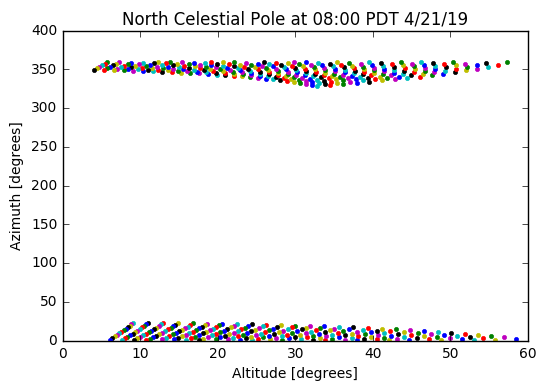

In [31]:
for i in range(len(ra_dec)):
    alt, az = ugradio.coord.get_altaz(ra_dec[i][0], ra_dec[i][1], jd=jd8, lat=leo.lat, lon=leo.lon, alt=leo.alt, equinox='J2019')
    plt.plot(alt, az, '.')
    plt.title('North Celestial Pole at 08:00 PDT 4/21/19')
    plt.xlabel('Altitude [degrees]')
    plt.ylabel('Azimuth [degrees]')
plt.show()

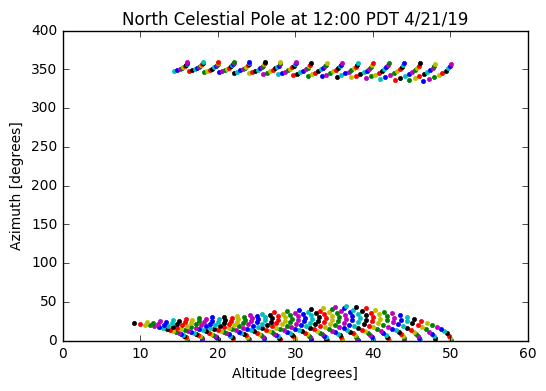

In [32]:
for i in range(len(ra_dec)):
    alt, az = ugradio.coord.get_altaz(ra_dec[i][0], ra_dec[i][1], jd=jd12, lat=leo.lat, lon=leo.lon, alt=leo.alt, equinox='J2019')
    plt.plot(alt, az, '.')
    plt.title('North Celestial Pole at 12:00 PDT 4/21/19')
    plt.xlabel('Altitude [degrees]')
    plt.ylabel('Azimuth [degrees]')
plt.show()

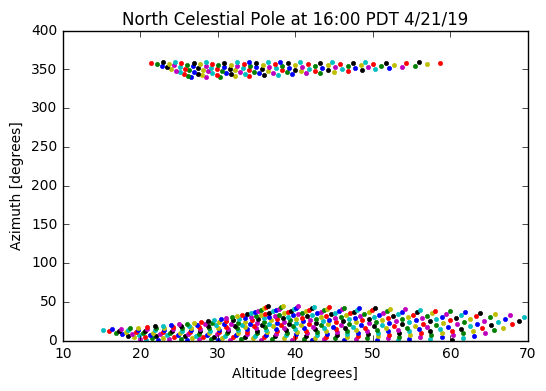

In [33]:
for i in range(len(ra_dec)):
    alt, az = ugradio.coord.get_altaz(ra_dec[i][0], ra_dec[i][1], jd=jd16, lat=leo.lat, lon=leo.lon, alt=leo.alt, equinox='J2019')
    plt.plot(alt, az, '.')
    plt.title('North Celestial Pole at 16:00 PDT 4/21/19')
    plt.xlabel('Altitude [degrees]')
    plt.ylabel('Azimuth [degrees]')
plt.show()

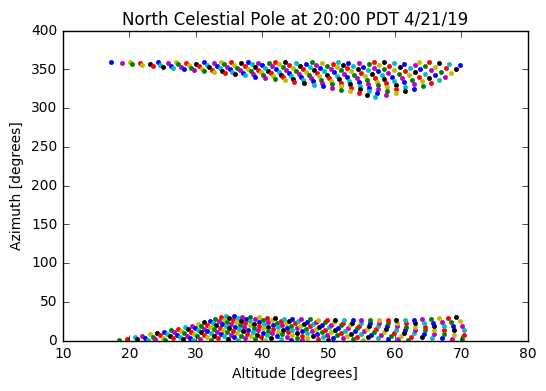

In [34]:
for i in range(len(ra_dec)):
    alt, az = ugradio.coord.get_altaz(ra_dec[i][0], ra_dec[i][1], jd=jd20, lat=leo.lat, lon=leo.lon, alt=leo.alt, equinox='J2019')
    plt.plot(alt, az, '.')
    plt.title('North Celestial Pole at 20:00 PDT 4/21/19')
    plt.xlabel('Altitude [degrees]')
    plt.ylabel('Azimuth [degrees]')
plt.show()